In [1]:
import pandas as pd 

### Read Train Dataset

In [2]:
df = pd.read_csv('train.csv')

This Dataset is different from Orginal Dataset in kaggle and I added some error in it manually. So first of all we need do some Data Engineering stuff to recognize and solve the issues

In [3]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  1309 non-null   int64  
 1   Survived     1309 non-null   int64  
 2   Pclass       1309 non-null   int64  
 3   Name         1309 non-null   object 
 4   Sex          1309 non-null   object 
 5   Age          1047 non-null   float64
 6   SibSp        1309 non-null   object 
 7   Parch        1309 non-null   object 
 8   Ticket       1309 non-null   object 
 9   Fare         1308 non-null   float64
 10  Cabin        295 non-null    object 
 11  Embarked     1307 non-null   object 
dtypes: float64(2), int64(3), object(7)
memory usage: 122.8+ KB


In [5]:
df.describe()

,PassengerId,Survived,Pclass,Age,Fare
count,1309.000000,1309.000000,1309.000000,1047.000000,1308.000000
mean,655.000000,0.377387,2.325439,30.131490,425.079118
std,378.020061,0.484918,1.215774,16.482628,14171.674524
min,1.000000,0.000000,1.000000,-31.000000,-13.000000
25%,328.000000,0.000000,2.000000,21.000000,7.895800
50%,655.000000,0.000000,3.000000,28.000000,14.454200
75%,982.000000,1.000000,3.000000,39.000000,31.275000
max,1309.000000,1.000000,33.000000,210.000000,512566.600000


### Short Description of features:
**Survived** = Passenger survived or not </br>
**PassengerId** = Passenger unique Id </br>
**Pclass** = Ticket class </br>
**Sex** = Passenger sex  </br>
**Age** = Passenger Age *in years*  </br>
**SibSp** = Number of siblings/spouses aboard the ship including the passenger  </br>
**ParCh** = Number of parents/children aboard the ship including the passenger  </br>
**Ticket** = Ticket number  </br>
**Fare** = Passenger fare  </br>
**Cabin** = Cabin number  </br>
**Embarked** = Port of passenger embarkation  </br>

The Dataset has 1309 examples and 11 features + the target variable (Survived). 2 of the features are floats, 3 are integers and 7 are objects.
Let's take a look at each feature

# Step 1 - Data Governance

In [6]:
df['Survived'].describe()

count    1309.000000
mean        0.377387
std         0.484918
min         0.000000
25%         0.000000
50%         0.000000
75%         1.000000
max         1.000000
Name: Survived, dtype: float64

Everything seems fine

In [7]:
df['PassengerId'].describe()

count    1309.000000
mean      655.000000
std       378.020061
min         1.000000
25%       328.000000
50%       655.000000
75%       982.000000
max      1309.000000
Name: PassengerId, dtype: float64

Everything seems fine

In [8]:
df['Pclass'].describe()

count    1309.000000
mean        2.325439
std         1.215774
min         1.000000
25%         2.000000
50%         3.000000
75%         3.000000
max        33.000000
Name: Pclass, dtype: float64

Something looks unnormal. max value and 75% and 50% and 25% and min does'n increase normal.let's look deeper on values

In [9]:
df['Pclass'].value_counts()

3     708
1     322
2     277
11      1
33      1
Name: Pclass, dtype: int64

Values 1,2,3 looks normal but we have one 11 and one 33 that based on feature description it seems these two values are error. so we should. let's look at their rows

In [10]:
df[df['Pclass']==11]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
11,12,1,11,"Bonnell, Miss. Elizabeth",Female,58.0,0,0,113783,26.55,C103,S


In [11]:
df[df['Pclass']==33]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
401,402,0,33,"Adams, Mr. John",male,26.0,0,0,341826,8.05,NaN,S


The other values seems alright and it seems there is no other issue in them. </br>
So we have two options: </br>
1- fill them with Null values </br>
2- based on the other values in this feature, maybe it was an input error so the value 11 is an error for value 1, and value 33 is an error for value 3. so maybe we can replace them with the currect values 1,3. </br>
I decided to replace them with the currect values.

In [12]:
df['Pclass'].replace(11,1, inplace=True)

In [13]:
df['Pclass'].replace(33,3, inplace=True)

In [14]:
df['Pclass'].value_counts()

3    709
1    323
2    277
Name: Pclass, dtype: int64

In [15]:
df['Pclass'].describe()

count    1309.000000
mean        2.294882
std         0.837836
min         1.000000
25%         2.000000
50%         3.000000
75%         3.000000
max         3.000000
Name: Pclass, dtype: float64

now everything looks normal </br>
Let's go to the next feature

In [16]:
df['Sex'].describe()

count     1309
unique      11
top       male
freq       837
Name: Sex, dtype: object

We have 8 unique values in Sex? it's not normal. Let's look inside

In [17]:
df['Sex'].unique()

array(['male', 'female', 'Female', 'malee', 'FEMALE', 'MALE', 'Male',
       'malle', 'femal', 'femmale', 'mmale'], dtype=object)

Oh, there is some Upper case and Lower case version of Male and Female value.

In [18]:
df['Sex'].value_counts()

male       837
female     462
malle        2
Female       1
malee        1
FEMALE       1
MALE         1
Male         1
femal        1
femmale      1
mmale        1
Name: Sex, dtype: int64

Ok, male and female are main values and the others should be convert to lower case

In [19]:
df['Sex'] = df['Sex'].apply(str.lower)

In [20]:
df['Sex'].value_counts()

male       839
female     464
malle        2
malee        1
femal        1
femmale      1
mmale        1
Name: Sex, dtype: int64

Ok, besides that, we have some other wrong input for male like malle and for female like femal. Let's correct them too.

In [21]:
female_group = ['femal', 'femmale']
df['Sex'].replace(female_group, 'female', inplace=True)

In [22]:
male_group = ['malle', 'malee', 'mmale']
df['Sex'].replace(male_group, 'male', inplace=True)

In [23]:
df['Sex'].value_counts()

male      843
female    466
Name: Sex, dtype: int64

now everything looks normal </br>
Let's go to the next feature

In [24]:
df['Age'].describe()

count    1047.000000
mean       30.131490
std        16.482628
min       -31.000000
25%        21.000000
50%        28.000000
75%        39.000000
max       210.000000
Name: Age, dtype: float64

Wow, min and max values seems incorrect. let's check them all

In [25]:
df[(df['Age'] < 0) | (df['Age'] > 100)]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
12,13,0,3,"Saundercock, Mr. William Henry",male,-20.0,0,0,A/5. 2151,8.0500,NaN,S
174,175,0,1,"Smith, Mr. James Clinch",male,156.0,0,0,17764,30.6958,A7,C
237,238,1,2,"Collyer, Miss. Marjorie ""Lottie""",female,-8.0,0,2,C.A. 31921,26.2500,NaN,S
368,369,1,3,"Jermyn, Miss. Annie",female,210.0,0,0,14313,7.7500,NaN,Q
432,433,1,2,"Louch, Mrs. Charles Alexander (Alice Adelaide ...",female,142.0,1,0,SC/AH 3085,26.0000,NaN,S
673,674,1,2,"Wilhelms, Mr. Charles",male,-31.0,0,0,244270,13.0000,NaN,S


For negetive values for Age we can replace them with exact positive values and also we can replace them with Null values. For values more than usual maximum age, let's take a look at higher values

In [26]:
df[(df['Age'] >= 0) & (df['Age'] <= 100)]['Age'].max()

80.0

So, the maximum Age under 100 is 80, that looks normal for a passenger. Let's continue remove incorrect Age values

In [27]:
import numpy as np

In [28]:
df.loc[(df['Age'] < 0) | (df['Age'] > 100), 'Age'] = np.nan

In [29]:
df['Age'].describe()

count    1041.000000
mean       29.873842
std        14.401212
min         0.170000
25%        21.000000
50%        28.000000
75%        39.000000
max        80.000000
Name: Age, dtype: float64

now everything looks normal </br>
Let's go to the next feature

In [30]:
df['SibSp'].describe()

count     1309
unique      11
top          0
freq       888
Name: SibSp, dtype: object

SibSp comes for Number of First-degree relatives boarded on ship together but type of this feature is Object so something is wrong. lets look at unique values

In [31]:
df['SibSp'].unique()

array(['1', '0', '3', '4', 'NO', '2', '5', '-1', '8', '-2', 'YES'],
      dtype=object)

We have some incorrect enteries here, like **NO** or **YES** or even **-1** and **-2**. lets count them all

In [32]:
df['SibSp'].value_counts()

0      888
1      317
2       41
4       22
3       20
8        9
5        6
NO       2
YES      2
-1       1
-2       1
Name: SibSp, dtype: int64

Ok, there is a few incorrect values. Let's check them one by one: </br>
***NO*** means the passenger is alone so we can replace them with 0 </br>
***YES*** means the passenger is not alone but we don't know how many other passengers are with this passenger so we can't replace it with a exact number. The count of values says that 0 with 888 frequency is on top of the list, but we are looking for a number except 0. the next one is 1 with 317 frequency, so we can replace **YES** with 1.</br>
***-1 and -2*** could be a entery mistake more than a incorrect value, so we can simply positive them

In [33]:
df['SibSp'].replace('NO', 0, inplace=True)

In [34]:
df['SibSp'].replace('YES', 1, inplace=True)

Now, the feature has not any non-number values so before processing ***-1*** and ***-2*** it's better to convert the feature type to int

In [35]:
df['SibSp'] = df['SibSp'].astype(int)

In [36]:
def make_positive(x):
    if x < 0:
        return x * -1
    return x

df['SibSp'] = df['SibSp'].apply(make_positive)

In [37]:
df['SibSp'].unique()

array([1, 0, 3, 4, 2, 5, 8], dtype=int64)

In [38]:
df['SibSp'].value_counts()

0    890
1    320
2     42
4     22
3     20
8      9
5      6
Name: SibSp, dtype: int64

now everything looks normal </br>
Let's go to the next feature

In [39]:
df['Parch'].describe()

count     1309
unique      12
top          0
freq       998
Name: Parch, dtype: object

In [40]:
df['Parch'].unique()

array(['0', '1', '2', '5', 'O', '3', '4', 'PC', 'F.C.C', 'WE', '6', '9'],
      dtype=object)

In [41]:
df['Parch'].value_counts()

0        998
1        169
2        112
3          8
5          6
4          6
O          3
6          2
9          2
PC         1
F.C.C      1
WE         1
Name: Parch, dtype: int64

The Parch feature is also about number of First-Class family so it should be number but its type is object because there is some incorrect values like ***PC*** or ***F.C.C*** or ***O*** in it. </br>
***O*** and ***0*** are the same in many cases so we can replace ***O*** with ***0*** </br>
the other String values are incorrect and should replace with ***0***</br>

In [42]:
def convert_to_int(x):
    try:
        return int(x)
    except ValueError as ve:
        return 0
    

df['Parch'] = df['Parch'].apply(convert_to_int)

because in every scenario the incorrect value should replace with ***0*** and type of all incorrect values is *string*, so I try to convert every value in this feature to int and ofcourse string values raise error during conversion so simply the function return ***0*** in exceptions.

In [43]:
df['Parch'].value_counts()

0    1004
1     169
2     112
3       8
5       6
4       6
6       2
9       2
Name: Parch, dtype: int64

now everything looks normal </br>
Let's go to the next feature

In [44]:
df['Ticket'].describe()

count         1309
unique         929
top       CA. 2343
freq            11
Name: Ticket, dtype: object

In [45]:
df['Ticket'].head(10)

0           A/5 21171
1            PC 17599
2    STON/O2. 3101282
3              113803
4              373450
5              330877
6               17463
7              349909
8              347742
9              237736
Name: Ticket, dtype: object

In [46]:
df['Ticket'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 1309 entries, 0 to 1308
Series name: Ticket
Non-Null Count  Dtype 
--------------  ----- 
1309 non-null   object
dtypes: object(1)
memory usage: 10.4+ KB


most of ticket numbers are unique and I don't think this feature has any relation to a passenger survive or not and we probably will drop this feature. so let's go to the next feature

In [47]:
df['Fare'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 1309 entries, 0 to 1308
Series name: Fare
Non-Null Count  Dtype  
--------------  -----  
1308 non-null   float64
dtypes: float64(1)
memory usage: 10.4 KB


In [48]:
df['Fare'].describe()

count      1308.000000
mean        425.079118
std       14171.674524
min         -13.000000
25%           7.895800
50%          14.454200
75%          31.275000
max      512566.600000
Name: Fare, dtype: float64

I see some incorrect values in ***Fare*** feature like ***-13*** which is under Zero or ***512566.6*** which is too high for a ticket price. for values below zero we can erase them but for very high values, first we need to know normal range of ticket. to do so we can use std mean

In [49]:
df['Fare'].std()

14171.67452379786

In [50]:
df['Fare'].mean()

425.07911842507644

In [51]:
df[df['Fare'] > (df['Fare'].mean() + df['Fare'].std())]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
336,337,0,1,"Pears, Mr. Thomas Clinton",male,29.0,1,0,113776,512566.6,C2,S


In [52]:
df[df['Fare'] < (df['Fare'].mean() + df['Fare'].std())]['Fare'].max()

512.3292

It seems that we just have a single record with very high value and without that record, maximum Fare will be 512ish. so we can simply replace its value with Null

In [53]:
df.loc[(df['Fare'] < 0) | (df['Fare'] > (df['Fare'].mean() + df['Fare'].std())), 'Fare'] = np.nan

In [54]:
df['Fare'].describe()

count    1305.000000
mean       33.302978
std        51.803069
min         0.000000
25%         7.895800
50%        14.454200
75%        31.275000
max       512.329200
Name: Fare, dtype: float64

Now, all values are normal and we can continue with the next feature

In [55]:
df['Cabin'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 1309 entries, 0 to 1308
Series name: Cabin
Non-Null Count  Dtype 
--------------  ----- 
295 non-null    object
dtypes: object(1)
memory usage: 10.4+ KB


In [56]:
df['Cabin'].describe()

count             295
unique            186
top       C23 C25 C27
freq                6
Name: Cabin, dtype: object

Cabin has alot of missing values and I believe that we should remove it from dataset. we leave it as it is for now.</br>
Let's go to the next feature

In [57]:
df['Embarked'].describe()

count     1307
unique       5
top          S
freq       912
Name: Embarked, dtype: object

In [58]:
df['Embarked'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 1309 entries, 0 to 1308
Series name: Embarked
Non-Null Count  Dtype 
--------------  ----- 
1307 non-null   object
dtypes: object(1)
memory usage: 10.4+ KB


In [59]:
df['Embarked'].unique()

array(['S', 'C', 'Q', nan, 's', 'q'], dtype=object)

In [60]:
df['Embarked'].value_counts()

S    912
C    270
Q    121
s      2
q      2
Name: Embarked, dtype: int64

Ok, it seems that lower case ***s*** and ***q*** should be convert to upper case.


In [61]:
df['Embarked'] = df['Embarked'].dropna().apply(str.upper)

In [62]:
df['Embarked'].value_counts()

S    914
C    270
Q    123
Name: Embarked, dtype: int64

In [63]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  1309 non-null   int64  
 1   Survived     1309 non-null   int64  
 2   Pclass       1309 non-null   int64  
 3   Name         1309 non-null   object 
 4   Sex          1309 non-null   object 
 5   Age          1041 non-null   float64
 6   SibSp        1309 non-null   int64  
 7   Parch        1309 non-null   int64  
 8   Ticket       1309 non-null   object 
 9   Fare         1305 non-null   float64
 10  Cabin        295 non-null    object 
 11  Embarked     1307 non-null   object 
dtypes: float64(2), int64(5), object(5)
memory usage: 122.8+ KB


Ok, everything goes good and know we can start to deal with missing values

Now its time to get some information about relation between freatures and target value.</br>
I don't think ***PassengerId*** has any relation with a high survival rate. same as ***Ticket*** and also ***Name*** of passengers.</br>
let's check the others

In [64]:
import matplotlib.pyplot as plt
import seaborn as sns

In [65]:
survived = df['Survived'] == 1
notsurvived = df['Survived'] == 0

[None, None, None, None]

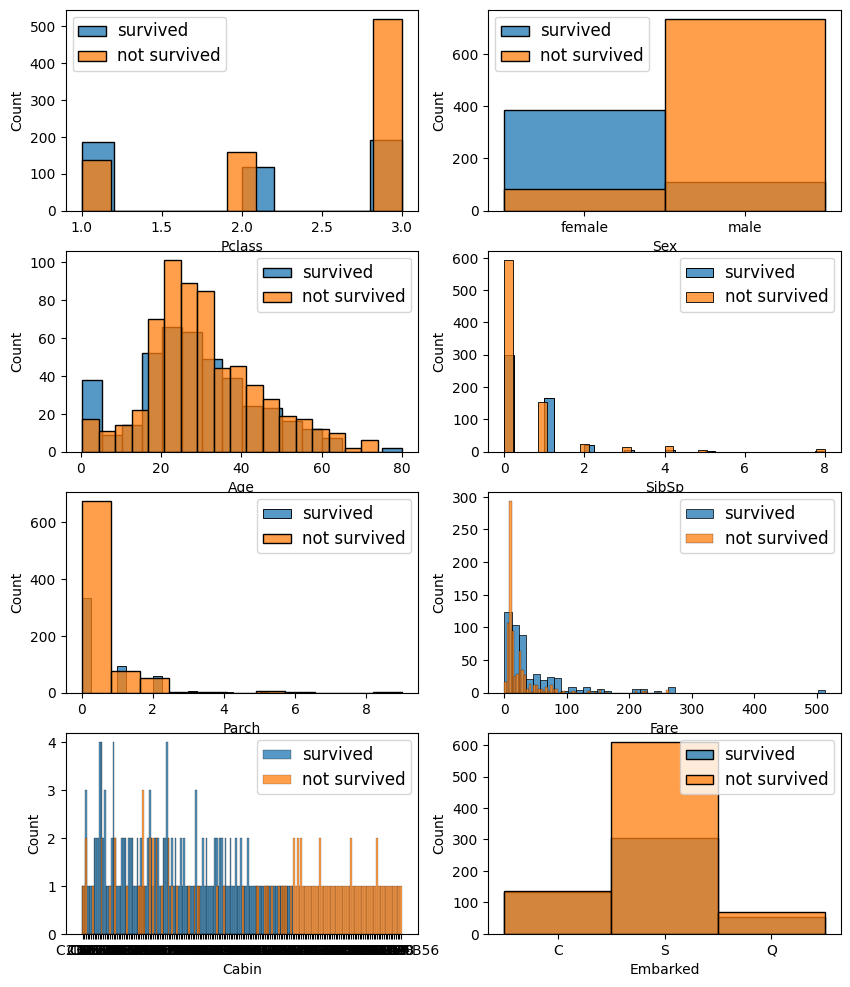

In [66]:
figure, axes = plt.subplots(nrows=4, ncols=2, figsize=(10, 12))

ax1 = sns.histplot(df[survived].Pclass.dropna(),ax=axes[0][0], label = 'survived', kde =False)
ax1 = sns.histplot(df[notsurvived].Pclass.dropna(),ax=axes[0][0], label = 'not survived', kde =False)
ax1.legend()
plt.setp(ax1.get_legend().get_texts(), fontsize='12')
# ax1.set_title('Pclass')

ax2 = sns.histplot(df[survived].Sex.dropna(),ax=axes[0][1], label = 'survived', kde =False)
ax2 = sns.histplot(df[notsurvived].Sex.dropna(),ax=axes[0][1], label = 'not survived', kde =False)
ax2.legend()
plt.setp(ax2.get_legend().get_texts(), fontsize='12')
# ax2.set_title('Sex')

ax3 = sns.histplot(df[survived].Age.dropna(),ax=axes[1][0], label = 'survived', kde =False)
ax3 = sns.histplot(df[notsurvived].Age.dropna(),ax=axes[1][0], label = 'not survived', kde =False)
ax3.legend()
plt.setp(ax3.get_legend().get_texts(), fontsize='12')
# ax3.set_title('Age')

ax4 = sns.histplot(df[survived].SibSp.dropna(),ax=axes[1][1], label = 'survived', kde =False)
ax4 = sns.histplot(df[notsurvived].SibSp.dropna(),ax=axes[1][1], label = 'not survived', kde =False)
ax4.legend()
plt.setp(ax4.get_legend().get_texts(), fontsize='12')
# ax4.set_title('SibSp')

ax5 = sns.histplot(df[survived].Parch.dropna(),ax=axes[2][0], label = 'survived', kde =False)
ax5 = sns.histplot(df[notsurvived].Parch.dropna(),ax=axes[2][0], label = 'not survived', kde =False)
ax5.legend()
plt.setp(ax5.get_legend().get_texts(), fontsize='12')
# ax5.set_title('Parch')

ax6 = sns.histplot(df[survived].Fare.dropna(),ax=axes[2][1], label = 'survived', kde =False)
ax6 = sns.histplot(df[notsurvived].Fare.dropna(),ax=axes[2][1], label = 'not survived', kde =False)
ax6.legend()
plt.setp(ax6.get_legend().get_texts(), fontsize='12')
# ax6.set_title('Fare')

ax7 = sns.histplot(df[survived].Cabin.dropna(),ax=axes[3][0], label = 'survived', kde =False)
ax7 = sns.histplot(df[notsurvived].Cabin.dropna(),ax=axes[3][0], label = 'not survived', kde =False)
ax7.legend()
plt.setp(ax7.get_legend().get_texts(), fontsize='12')
# ax7.set_title('Cabin')

ax8 = sns.histplot(df[survived].Embarked.dropna(),ax=axes[3][1], label = 'survived', kde =False)
ax8 = sns.histplot(df[notsurvived].Embarked.dropna(),ax=axes[3][1], label = 'not survived', kde =False)
ax8.legend()
plt.setp(ax8.get_legend().get_texts(), fontsize='12')
# ax8.set_title('Embarked')

Plots shows that 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', And 'Embarked' may somehow related to survival of a passenger. but I can't say so for ***Cabin***. let's take a deeper look at its values

In [67]:
df['Cabin'].dropna()

1        C85
3       C123
6        E46
10        G6
11      C103
        ... 
1295     D40
1296     D38
1298     C80
1302     C78
1305    C105
Name: Cabin, Length: 295, dtype: object

it looks like every Cabin number starts with a letter and then a number. Let's split its letters

In [68]:
df['Cabin'].str[0].dropna().unique()

array(['C', 'E', 'G', 'D', 'A', 'B', 'F', 'T'], dtype=object)

every Cabin number starts with a letter A-G and T . If this letters shows the position of Cabin in the ship, it may related to passengers survivals. as I mentioned before missing values in this feature is more than 77 percent. but if we extract the letters from Cabin number and then categorize passenger based on this letters and assume others as a seperate category then maybe this grouping help the machine for better learning. so let's do it

In [69]:
df['Cabin'] = df['Cabin'].str[0]

In [70]:
df['Cabin'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 1309 entries, 0 to 1308
Series name: Cabin
Non-Null Count  Dtype 
--------------  ----- 
295 non-null    object
dtypes: object(1)
memory usage: 10.4+ KB


In [71]:
df['Cabin'].value_counts()

C    94
B    65
D    46
E    41
A    22
F    21
G     5
T     1
Name: Cabin, dtype: int64

## Dealing with missing values

First of all let's take a look at missing value statistic

In [72]:
total = df.isnull().sum().sort_values(ascending=False)
prcnt1 = df.isnull().sum()/df.isnull().count()*100
prcnt2 = (round(prcnt1, 1)).sort_values(ascending=False)
missing_data = pd.concat([total, prcnt2], axis=1, keys=['Total', '%'])
missing_data

,Total,%
Cabin,1014,77.5
Age,268,20.5
Fare,4,0.3
Embarked,2,0.2
PassengerId,0,0.0
Survived,0,0.0
Pclass,0,0.0
Name,0,0.0
Sex,0,0.0
SibSp,0,0.0


***Cabin*** with more than 77 percent missing values should has been removed from Dataset but with last change we provide on the values now we can assume missing values as a separate category and keep moving</br>
***Fare*** and ***Embarked*** with less than 1 percent missing values can fill with proper values </br>
but dealing with ***Age*** is more tricky and needs more investigation.</br>
for now let's take care of ***Fare*** and ***Embarked***

In [73]:
df['Embarked'].value_counts()

S    914
C    270
Q    123
Name: Embarked, dtype: int64

**S** has more freq so we fill missing values with this value. 

In [74]:
df['Embarked'].fillna('S', inplace=True)

In [75]:
df['Fare'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 1309 entries, 0 to 1308
Series name: Fare
Non-Null Count  Dtype  
--------------  -----  
1305 non-null   float64
dtypes: float64(1)
memory usage: 10.4 KB


In [76]:
df['Fare'].describe()

count    1305.000000
mean       33.302978
std        51.803069
min         0.000000
25%         7.895800
50%        14.454200
75%        31.275000
max       512.329200
Name: Fare, dtype: float64

We have **0** in values so I simple fill missing values with **0**

In [77]:
df['Fare'].fillna(0, inplace=True)

In [78]:
df['Fare'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 1309 entries, 0 to 1308
Series name: Fare
Non-Null Count  Dtype  
--------------  -----  
1309 non-null   float64
dtypes: float64(1)
memory usage: 10.4 KB


Now it's time to take care of ***Age*** missing Values.

In [79]:
df['Age'].describe()

count    1041.000000
mean       29.873842
std        14.401212
min         0.170000
25%        21.000000
50%        28.000000
75%        39.000000
max        80.000000
Name: Age, dtype: float64

I want to show how you can fill missing values with random values in range of most freq values (mean-std - mean+std).

In [80]:
# Create a series of random Age as many as missing values
random_ages = np.random.randint(df['Age'].mean() - df['Age'].std(), 
                                df['Age'].mean() + df['Age'].std(), 
                                size = df['Age'].isnull().sum())

copy_ages = df['Age'].copy()
# Create a copy of Age feature

copy_ages[np.isnan(copy_ages)] = random_ages
# Fill missing values with random values we just created

At the end Replace filled Column with old column with this line of code:</br>
df['Age'] = copy_ages </br>

but I don't want to go this way</br>
I believe that Age of passengers is corelated to passenger's survival and I don't want to currupt existing information about their age by mixing them with some random numbers. so I simply leave them as they currently are. so missing values create a new category in next steps as *unknown*

Dealing with missing values finished here and we countinue our journey by dealing with unnecessary features

In [81]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  1309 non-null   int64  
 1   Survived     1309 non-null   int64  
 2   Pclass       1309 non-null   int64  
 3   Name         1309 non-null   object 
 4   Sex          1309 non-null   object 
 5   Age          1041 non-null   float64
 6   SibSp        1309 non-null   int64  
 7   Parch        1309 non-null   int64  
 8   Ticket       1309 non-null   object 
 9   Fare         1309 non-null   float64
 10  Cabin        295 non-null    object 
 11  Embarked     1309 non-null   object 
dtypes: float64(2), int64(5), object(5)
memory usage: 122.8+ KB


I believe that **PassengerId** has no relation to passenger survival. So I put it in the removable list. passenger **Name** and **Ticket** number can't effect Survival status so I put these attributes in removable list too.
Other attributes may have correlation with Survival status.

Let's take care of removable list

In [82]:
df.drop(['PassengerId', 'Name', 'Ticket'], axis=1, inplace=True)

In [83]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  1309 non-null   int64  
 1   Pclass    1309 non-null   int64  
 2   Sex       1309 non-null   object 
 3   Age       1041 non-null   float64
 4   SibSp     1309 non-null   int64  
 5   Parch     1309 non-null   int64  
 6   Fare      1309 non-null   float64
 7   Cabin     295 non-null    object 
 8   Embarked  1309 non-null   object 
dtypes: float64(2), int64(4), object(3)
memory usage: 92.2+ KB


Now, it's time to check relation possibilities between attributes and target value. </br>

## Age and Sex


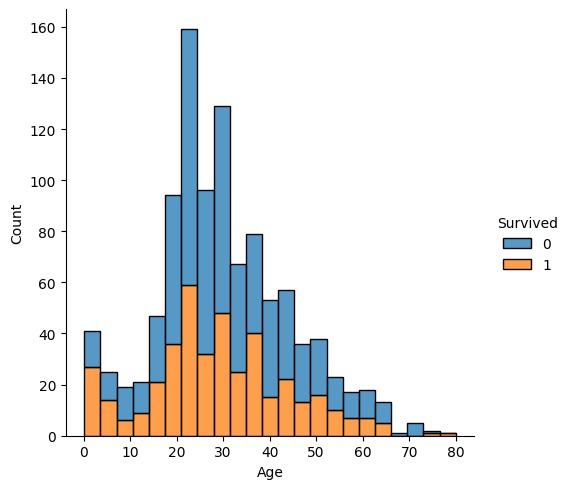

In [102]:
sns.displot(x='Age', hue='Survived', multiple='stack', data=df)

<Axes: xlabel='Sex', ylabel='count'>

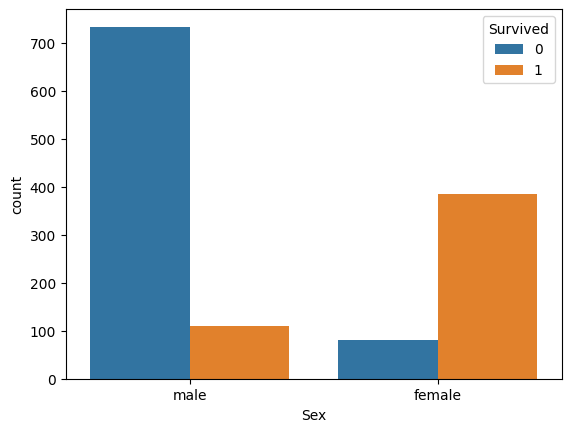

In [104]:
sns.countplot(x='Sex', hue='Survived', data=df)

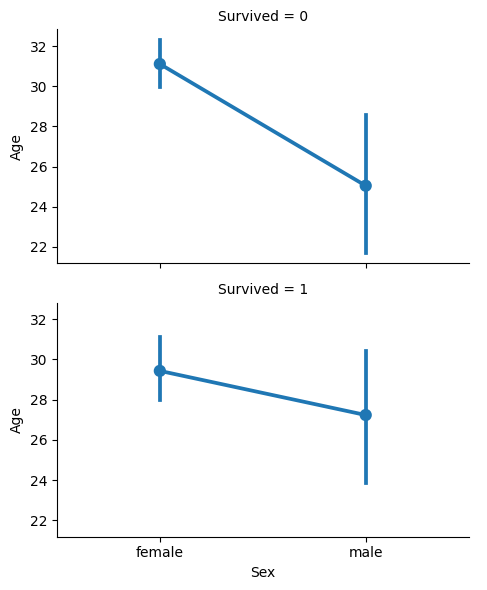

In [111]:
fg = sns.FacetGrid(df, row='Survived', aspect=1.6)
fg.map(sns.pointplot, 'Sex', 'Age', palette=None,  order=None, hue_order=None )
fg.add_legend()

## Pclass

<Axes: xlabel='Pclass', ylabel='count'>

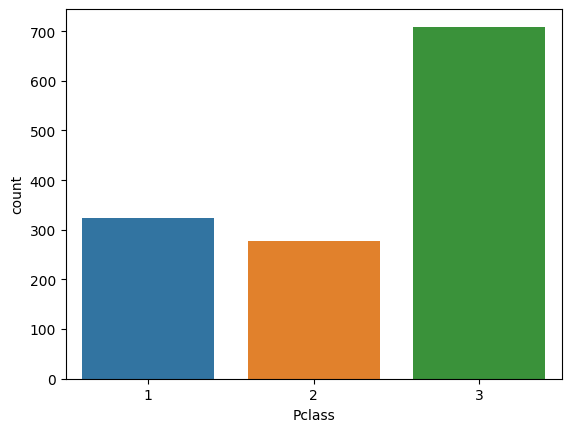

In [113]:
sns.countplot(x='Pclass', data=df)

<Axes: xlabel='Pclass', ylabel='count'>

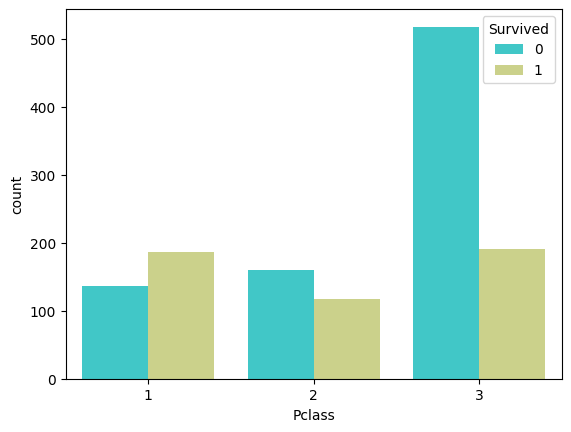

In [115]:
sns.countplot(x='Pclass', data=df, hue='Survived', palette='rainbow')

([<matplotlib.patches.Wedge at 0x28ee4821f90>,
 [Text(0.7857105465133536, 0.7698434497335723, '1'),
  Text(-0.6607895333039293, 0.8794072962376283, '2'),
  Text(-0.14346972497658556, -1.0906037034666365, '3')])

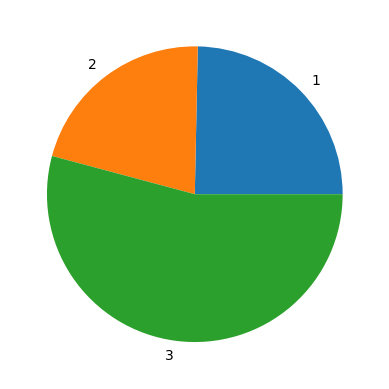

In [147]:
pclass = pd.DataFrame()
pclass['cnt'] = df.groupby('Pclass')['Pclass'].count()

pclass['prcnt'] = pclass['cnt'] / sum(pclass['cnt']) * 100

plt.pie(x='prcnt', data=pclass, labels=pclass.index)

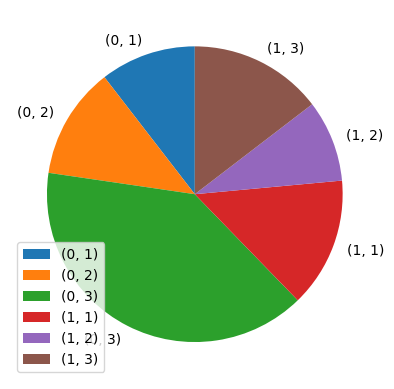

In [148]:
pclass2 = pd.DataFrame()
pclass2['cnt'] = df.groupby(['Survived', 'Pclass'])['Pclass'].count()


pclass2['prcnt'] = pclass2['cnt'] / sum(pclass2['cnt']) * 100

plt.pie(x='prcnt', data=pclass2, labels=pclass2.index,startangle = 90)
plt.legend()